In [1]:
import sklearn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)
pd.options.display.max_rows = 20

import warnings
warnings.filterwarnings('ignore')

In [2]:
import re

def cleaning_data(code_data):
    text = code_data
    text = text.replace('(<br/>)', '')
    text = text.replace('(<a).*(>).*(</a>)', '')
    text = text.replace('(&amp)', '')
    text = text.replace('(&gt)', '')
    text = text.replace('(&lt)', '')
    text = text.replace('(\xa0)', ' ')
    text = text.replace('-', ' ')
    text = text.replace('(', ' ')
    text = text.replace(')', ' ')
    text = filtering(text)
    return text.strip()

def filtering(text):
    stripped = re.sub('[^a-zA-Z, ^А-Я,а-я,Ә,І,Ң,Ғ,Ү,Ұ,Қ,Ө,Һ,ә,і,ə,ң,ғ,ү,ұ,қ,ө,һ]', ' ', str(text).replace('-', ''))
    stripped = re.sub('_', '', stripped)
    stripped = re.sub('\s+', ' ', stripped)
    return str(stripped).lower()

In [4]:
df = pd.read_csv("dataset/Dataset_12classes.csv")
df['text'] = df['text'].apply(cleaning_data)
df

,category,text,label_cat
0,01_auto.txt,автоваз жол талғамайтын көліктерге жеңілдік бе...,0
1,01_auto.txt,автоваз екінші буын granta және kalina модельд...,0
2,01_auto.txt,avtopole honda accord sport қа назар аударады ...,0
3,01_auto.txt,бомбил қорқып кетті енді жоқ санкт петербург п...,0
4,01_auto.txt,әскери өнеркәсіп компаниясы гибридті электр ст...,0
...,...,...,...
22022,12_travel.txt,осы қарсаңда ақш тың арнайы қызметтері бірнеше...,11
22023,12_travel.txt,wizz air әуе компаниясының бухаресттен румыния...,11
22024,12_travel.txt,сіз сондай ақ қыста жаздың күн сәулесінен раха...,11
22025,12_travel.txt,сыраның барлық әуесқойлары үшін нағыз мереке б...,11


In [5]:
df['text_length'] = df['text'].apply(len)
df['text_word_count'] = df['text'].apply(lambda x: len(x.split(' ')))
df['text_avg_length'] = df['text'].apply(lambda x: round(len(x)/len(x.split(' ')), 2))
df

,category,text,label_cat,text_length,text_word_count,text_avg_length
0,01_auto.txt,автоваз жол талғамайтын көліктерге жеңілдік бе...,0,643,86,7.48
1,01_auto.txt,автоваз екінші буын granta және kalina модельд...,0,886,111,7.98
2,01_auto.txt,avtopole honda accord sport қа назар аударады ...,0,1270,154,8.25
3,01_auto.txt,бомбил қорқып кетті енді жоқ санкт петербург п...,0,1339,161,8.32
4,01_auto.txt,әскери өнеркәсіп компаниясы гибридті электр ст...,0,2016,245,8.23
...,...,...,...,...,...,...
22022,12_travel.txt,осы қарсаңда ақш тың арнайы қызметтері бірнеше...,11,896,107,8.37
22023,12_travel.txt,wizz air әуе компаниясының бухаресттен румыния...,11,4585,590,7.77
22024,12_travel.txt,сіз сондай ақ қыста жаздың күн сәулесінен раха...,11,3529,432,8.17
22025,12_travel.txt,сыраның барлық әуесқойлары үшін нағыз мереке б...,11,672,92,7.30


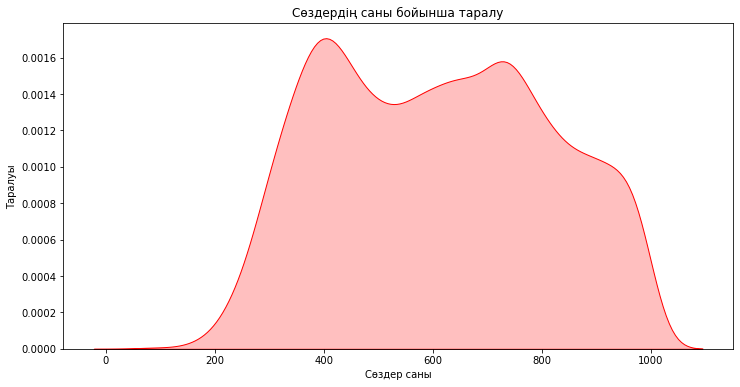

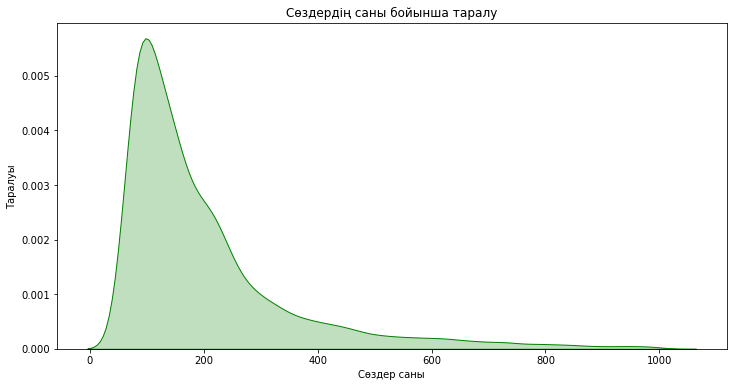

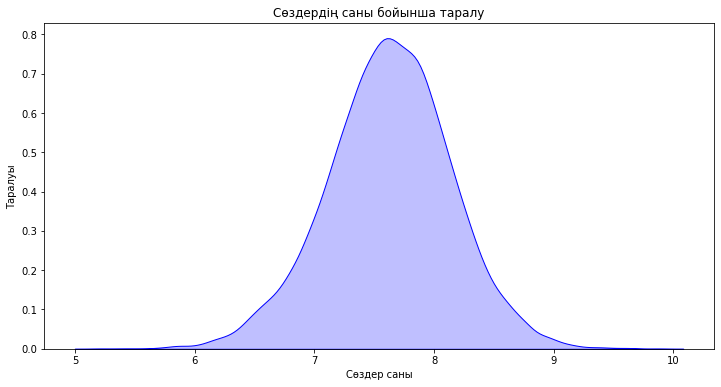

In [6]:
plt.figure(figsize=(12,6))
sns.kdeplot(df[df['text_length'] > 60][df['text_length'] < 1000]['text_length'], shade=True, color="r").set_title("Сөздердің саны бойынша таралу")
plt.xlabel("Сөздер саны")
plt.ylabel("Таралуы")
plt.show()

plt.figure(figsize=(12,6))
sns.kdeplot(df[df['text_word_count'] > 60][df['text_word_count'] < 1000]['text_word_count'], shade=True, color="g").set_title("Сөздердің саны бойынша таралу")
plt.xlabel("Сөздер саны")
plt.ylabel("Таралуы")
plt.show()

plt.figure(figsize=(12,6))
sns.kdeplot(df[df['text_avg_length'] < 1000]['text_avg_length'], shade=True, color="b").set_title("Сөздердің саны бойынша таралу")
plt.xlabel("Сөздер саны")
plt.ylabel("Таралуы")
plt.show()

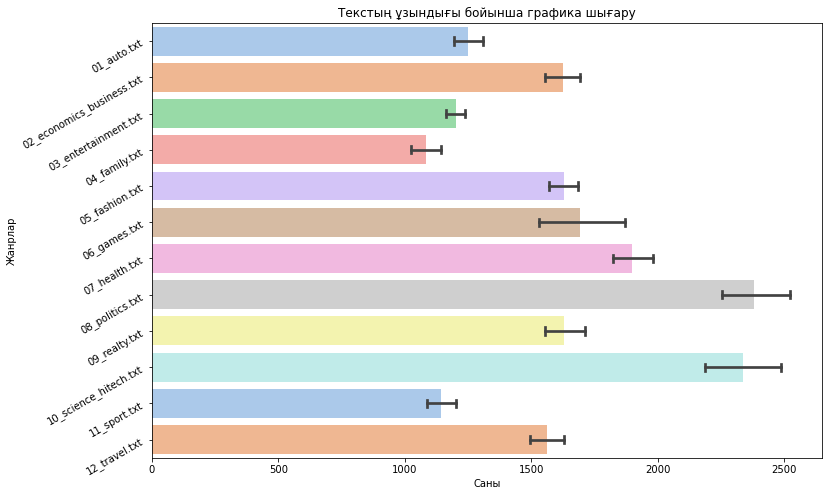

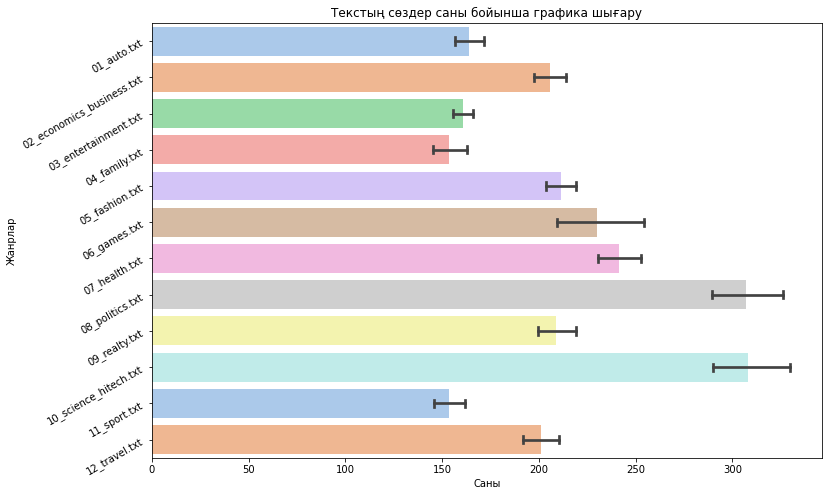

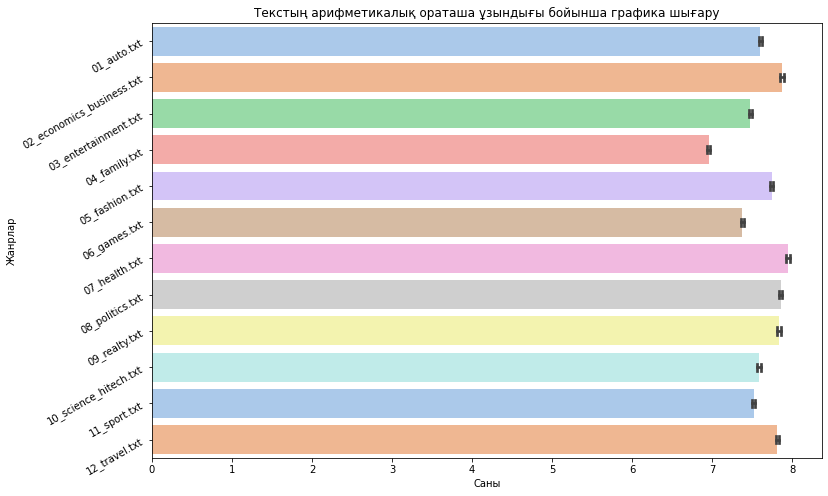

In [7]:
g = sns.barplot(x="text_length",
                y="category",
                data=df,
                capsize=.2,
                palette="pastel")
g.set_yticklabels(g.get_yticklabels(), rotation=30)
plt.title("Текстың ұзындығы бойынша графика шығару")
plt.xlabel("Саны")
plt.ylabel("Жанрлар")
plt.show()

g = sns.barplot(x="text_word_count",
                y="category",
                data=df,
                capsize=.2,
                palette="pastel")
g.set_yticklabels(g.get_yticklabels(), rotation=30)
plt.title("Текстың сөздер саны бойынша графика шығару")
plt.xlabel("Саны")
plt.ylabel("Жанрлар")
plt.show()

g = sns.barplot(x="text_avg_length",
                y="category",
                data=df,
                capsize=.2,
                palette="pastel")
g.set_yticklabels(g.get_yticklabels(), rotation=30)
plt.title("Текстың арифметикалық ораташа ұзындығы бойынша графика шығару")
plt.xlabel("Саны")
plt.ylabel("Жанрлар")
plt.show()

Text(0.5, 1.0, 'Сөздер бұлты')

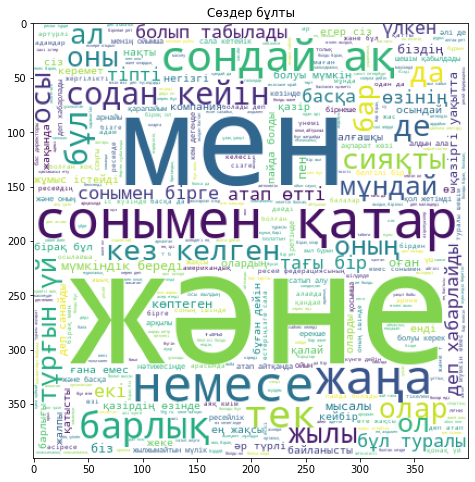

In [8]:
from wordcloud import WordCloud
desc = ' '.join(df.text.tolist())

wc_desc = WordCloud(background_color='white', max_words=400, width=400, height=400,random_state=10).generate(desc)
plt.figure(figsize=(12,8))
plt.imshow(wc_desc)
plt.title("Сөздер бұлты")

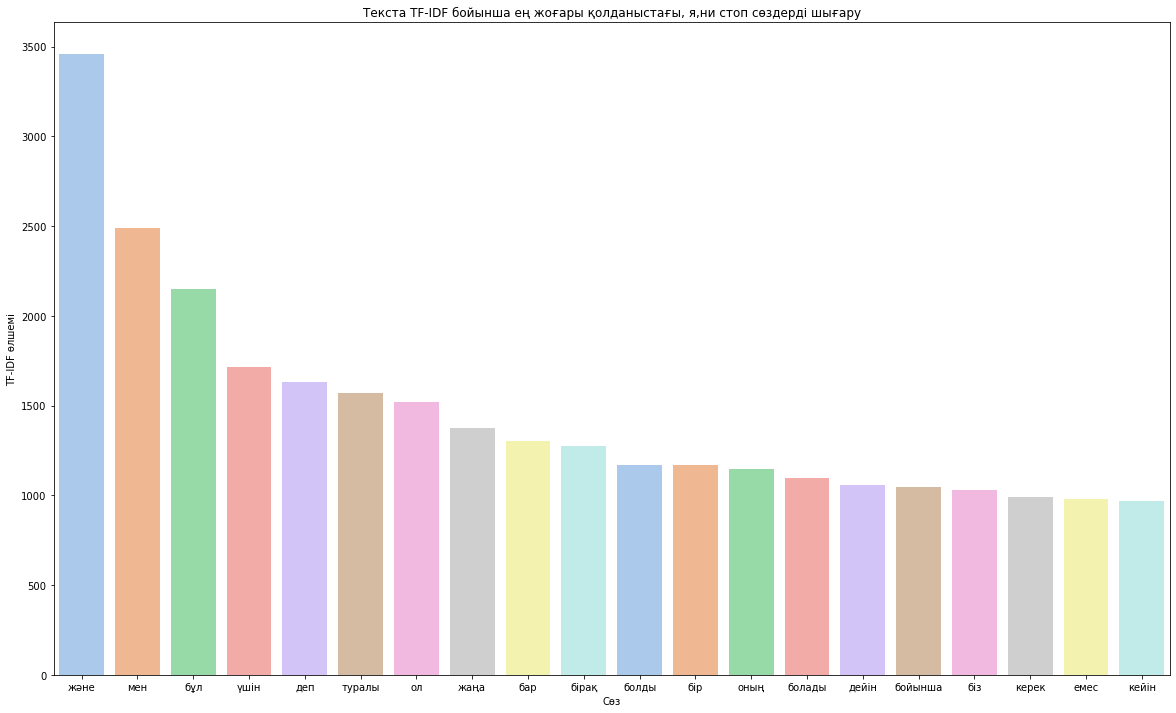

In [9]:
vectorizer = TfidfVectorizer(lowercase=True, min_df = 0.1)
tfidf = vectorizer.fit_transform(df.text)

feature_array = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(tfidf.toarray().sum(axis=0)).flatten()[::-1]

n = 20
top_n_fe = feature_array[tfidf_sorting][:n]
top_n_tf = tfidf.toarray().sum(axis=0)[tfidf_sorting][:n]

plt.figure(figsize=(20,12))
sns.barplot(y=top_n_tf, x=top_n_fe, palette="pastel")
plt.title("Текста TF-IDF бойынша ең жоғары қолданыстағы, я,ни стоп сөздерді шығару")
plt.xlabel("Сөз")
plt.ylabel("TF-IDF өлшемі")
plt.show()